In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_C_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
3,6.0,8.0,8.0,1.0,3.0,4.0,NaN,7.0,1.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
679,2.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
680,5.0,10.0,10.0,10.0,4.0,10.0,5.0,6.0,3.0
681,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	7
float64		column 2	4
float64		column 3	8
float64		column 4	6
float64		column 5	8
float64		column 6	4
float64		column 7	7
float64		column 8	6
float64		column 9	11


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,676.000000,679.000000,675.000000,677.000000,675.000000,679.000000,676.000000,677.000000,672.000000
mean,4.430473,3.153166,3.225185,2.840473,3.235556,3.537555,3.445266,2.865583,1.572917
std,2.815232,3.065189,2.998460,2.873767,2.229937,3.641127,2.446153,3.052007,1.677602
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

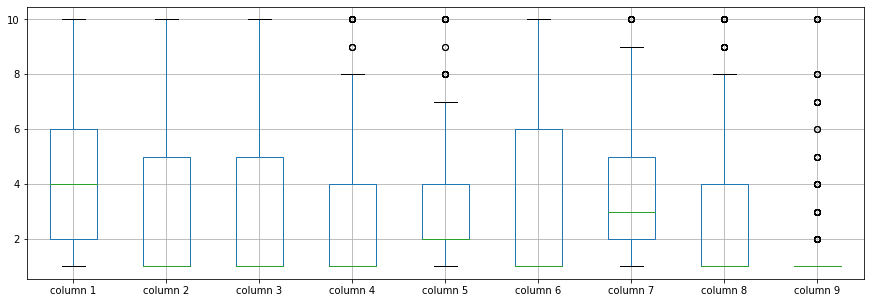

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.430473
column 2    3.153166
column 3    3.225185
column 4    2.840473
column 5    3.235556
column 6    3.537555
column 7    3.445266
column 8    2.865583
column 9    1.572917
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.636936,0.650245,0.487510,0.522250,0.587687,0.550054,0.527082,0.359380
column 2,0.636936,1.000000,0.908227,0.710412,0.755208,0.690367,0.753829,0.718764,0.467047
column 3,0.650245,0.908227,1.000000,0.687563,0.723889,0.715281,0.734263,0.717002,0.445420
column 4,0.487510,0.710412,0.687563,1.000000,0.600682,0.673288,0.668442,0.608321,0.413850
column 5,0.522250,0.755208,0.723889,0.600682,1.000000,0.587790,0.619813,0.629569,0.498992
column 6,0.587687,0.690367,0.715281,0.673288,0.587790,1.000000,0.681110,0.580865,0.337768
column 7,0.550054,0.753829,0.734263,0.668442,0.619813,0.681110,1.000000,0.666967,0.341646
column 8,0.527082,0.718764,0.717002,0.608321,0.629569,0.580865,0.666967,1.000000,0.437008
column 9,0.359380,0.467047,0.445420,0.413850,0.498992,0.337768,0.341646,0.437008,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+10,9+10+10,9+10+10,9+10+10+10+10,9+10+10+10,9+10+10,9+10,9], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 36.64272730691092
Epoch: 1 , loss: 36.608183588300435
Epoch: 2 , loss: 36.45368190038772
Epoch: 3 , loss: 36.35589772179013
Epoch: 4 , loss: 36.3129251116798
Epoch: 5 , loss: 35.85296194893973
Epoch: 6 , loss: 36.08203156789144
Epoch: 7 , loss: 36.26207347143264
Epoch: 8 , loss: 36.027515729268394
Epoch: 9 , loss: 35.683493750435964
Epoch: 10 , loss: 35.49098332722982
Epoch: 11 , loss: 34.808243479047505
Epoch: 12 , loss: 33.53314921969459
Epoch: 13 , loss: 32.755965142022994
Epoch: 14 , loss: 31.290584382556734
Epoch: 15 , loss: 30.73267582484654
Epoch: 16 , loss: 29.40907880238124
Epoch: 17 , loss: 29.052096048990887
Epoch: 18 , loss: 28.998087156386603
Epoch: 19 , loss: 29.263717242649623
Epoch: 20 , loss: 29.104117302667525
Epoch: 21 , loss: 29.243758065359934
Epoch: 22 , loss: 29.134349391573952
Epoch: 23 , loss: 29.444435800824845
Epoch: 24 , loss: 29.07674548739479
Epoch: 25 , loss: 29.3375603130

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.0
column 2    1.0
column 3    1.0
column 4    1.0
column 5    2.0
column 6    1.0
column 7    2.0
column 8    1.0
column 9    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,-2.79042,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
678,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
679,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
680,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
681,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(33.292138075238455, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.09928225043154193

In [18]:
new_df.iloc[66,:]

column 1    1.000000
column 2    3.000000
column 3    3.000000
column 4    2.000000
column 5    2.000000
column 6    1.000000
column 7    7.000000
column 8    0.206117
column 9    1.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1.0,1.0,2.0,1.0,3.00000,1.0,1.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.00000,2.0,1.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.00000,1.0,1.0
3,6.0,8.0,8.0,1.0,3.0,4.0,0.20958,7.0,1.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.00000,1.0,1.0
...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,1.0,2.0,1.0,2.00000,1.0,1.0
679,2.0,1.0,1.0,1.0,2.0,1.0,3.00000,1.0,1.0
680,5.0,10.0,10.0,10.0,4.0,10.0,5.00000,6.0,3.0
681,1.0,1.0,1.0,3.0,2.0,1.0,1.00000,1.0,1.0


In [20]:
imputations[-1].to_excel("BCW_C_1(imp).xlsx", index=False, header=False)